# MNIST Sınıflandırması

🎯 <b><u>Egzersiz hedefleri</u></b>
- *MNIST* veri setini anlama 
- İlk **Evrişimli Sinir Ağınızı** (*CNN*) tasarlama ve şu soruları yanıtlama:
    - *Evrişim Katmanları* nelerdir? 
    - böyle bir katmanda kaç *parametre* bulunur?
- Bu CNN'i görüntüler üzerinde eğitme

🚀 <b><u>Hadi başlayalım!</u></b>

Zamanında 90'lara geri döndüğümüzü hayal edin.
Bir *Postanede* çalışıyorsunuz ve günlük olarak çok büyük miktarda mektupla uğraşmanız gerekiyor. 5 el yazısı rakamın kombinasyonu olan Posta Kodlarını okuma sürecini nasıl otomatikleştirebilirsiniz?

**El Yazısı Tanıma** olarak adlandırılan bu görev, o günlerde çok karmaşık bir problemdi. Bu problem, Derin Öğrenme gurularından biri olan [*Yann Le Cun*](https://en.wikipedia.org/wiki/Yann_LeCun)'ın çalıştığı *Bell Labs* (ve diğerleri) tarafından çözüldü.

[Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition)'dan:

> El yazısı tanıma (HWR), aynı zamanda El Yazısı Metin Tanıma (HTR) olarak da bilinir, bir bilgisayarın kağıt belgeler, fotoğraflar, dokunmatik ekranlar ve diğer cihazlar gibi kaynaklardan gelen anlaşılabilir el yazısı girişleri alabilme ve yorumlayabilme yeteneğidir

![Sayı tanıma](recognition.gif)

*Not: Yukarıdaki animasyon sadece farklı görüntülerle ne olduğunu görselleştirmenize yardımcı olmak için buradadır: <br/> $\rightarrow$ Her görüntü için, CNN eğitildikten sonra hangi rakamın yazıldığını tahmin edecektir. Girişler farklı rakamlar olup bir animasyon/video değildir!*

🤔 <b><u>Bu CNN nasıl çalışır?</u></b>

- *Girişler*: Görüntüler (_her görüntü el yazısı bir rakam gösterir_)
- *Hedef*: Her görüntü için CNN modelinizin doğru rakamı (0 ile 9 arasında) tahmin etmesini istiyorsunuz
    - Bu bir **çok sınıflı sınıflandırma** görevidir (daha kesin olarak 10 farklı rakam olduğu için 10 sınıflı sınıflandırma görevi).

🔢 Evrişimli Sinir Ağının bu sayıları okuma kapasitesini geliştirmek için, ona el yazısı rakamları temsil eden birçok görüntü beslemek gerekir. Bu nedenle 📚 [**MNIST veri seti**](http://yann.lecun.com/exdb/mnist/) *(Karma Ulusal Standartlar ve Teknoloji Enstitüsü)* oluşturulmuştur.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (1) `MNIST` Veri Seti

📚 Tensorflow/Keras oynamak için birden fazla [**veri seti**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) sunar:
- *Vektörler*: `boston_housing` (regresyon)
- *Görüntüler* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (sınıflandırma)
- *Metinler*: `imbd`, `reuters` (sınıflandırma/duygu analizi)


💾 **MNIST veri setini** aşağıdaki komutlarla **yükleyebilirsiniz**:

In [2]:
from keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

2026-01-22 11:56:35.189111: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-22 11:56:35.197048: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-22 11:56:35.264197: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-22 11:56:35.350489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-22 11:56:35.435331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### (1.1) Veri setini keşfetme

❓ **Soru: Bu MNIST veri setindeki bazı el yazısı rakamlarına bakalım.** ❓

🖨 *Eğitim setindeki* bazı görüntüleri yazdırın.

<details>
    <summary><i>İpuçları</i></summary>

💡*İpucu*: `matplotlib`'den `imshow` fonksiyonunu `cmap = "gray"` ile kullanın

🤨 Not: Bu *cmap* argümanını belirtmezseniz, garip görünen renkler sadece Matplotlib varsayılanlarıdır...
    
</details>

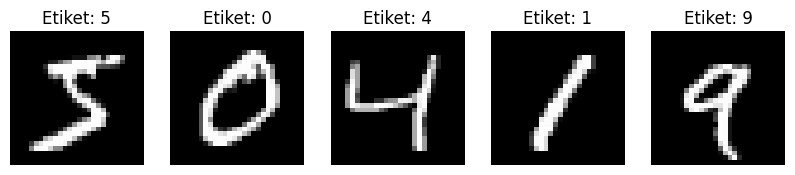

In [3]:
# Figür boyutunu ayarlayalım (Genişlik, Yükseklik)
plt.figure(figsize=(10, 2))

# İlk 5 görüntüyü döngü ile gezelim
for i in range(5):
    # Yan yana 5 grafik çizmek için subplot kullanıyoruz
    plt.subplot(1, 5, i + 1)
    
    # i. görüntüyü (X_train[i]) gri tonlamalı (cmap="gray") olarak çizelim
    plt.imshow(X_train[i], cmap='gray')
    
    # Başlığa o görüntünün etiketini (y_train[i]) yazalım
    plt.title(f"Etiket: {y_train[i]}")
    
    # Eksenleri kapatalım (daha temiz bir görüntü için)
    plt.axis('off')

# Grafiği gösterelim
plt.show()

### (1.2) Görüntü Ön İşleme

❗️ **Sinir Ağları, giriş verisi bir şekilde normalize edildiğinde daha hızlı yakınsama yapar** ❗️

👩🏻‍🏫 Evrişimli Sinir Ağları için nasıl devam ederiz?
* `RGB` yoğunlukları 0 ile 255 arasında kodlanır. 
* Giriş verisini maksimum değer olan 255'e bölerek tüm piksellerin yoğunluklarını 0 ile 1 arasında tutabiliriz 😉

❓ **Soru ❓ İlk ön işleme adımı olarak lütfen verilerinizi normalize edin.** 

Bunu hem eğitim verilerinize hem de test verilerinize yapmayı unutmayın.

(*Not: tüm değerlerden 0.5 çıkararak verilerinizi merkezleyebilirsiniz de, ancak bu zorunlu değildir*)

In [4]:
# Maksimum değerin 255 olduğunu biliyoruz, bu yüzden direkt bölebiliriz.
# Bölme işlemi sonucu otomatik olarak ondalıklı sayıya (float) dönüşecektir.

X_train = X_train / 255.0
X_test = X_test / 255.0

### (1.3) Girişlerin boyutları

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


👆 60.000 eğitim görüntünüz ve 10.000 test görüntünüz olduğunu, her birinin $(28, 28)$ boyutunda olduğunu hatırlayın. Ancak...

> ❗️  **`Evrişimli Sinir Ağı modelleri, son boyutu kanal sayısı olan görüntülerle beslenmelidir`.**  

> 🧑🏻‍🏫 ***ConvNet'lere*** beslenen tensörlerin şekli şu şekildedir: `(GÖRÜNTÜ_SAYISI, YÜKSEKLİK, GENİŞLİK, KANALLAR)`

🕵🏻Bu son boyut burada açıkça eksik. Nedenini tahmin edebilir misiniz?
<br>
<details>
    <summary><i>Cevap<i></summary>
        
* Tüm bu $60000$ $ (28 \times 28) $ resim siyah-beyaz $ \implies $ Her piksel tam siyahtan (0) tam beyaza (1) kadar bir spektrumda yaşar.
        
    * Teorik olarak, siyah-beyaz bir resim için kanal sayısını bilmenize gerek yoktur çünkü yalnızca 1 kanal vardır (bir pikselin "beyazlığı" veya "siyahlığı"). Ancak, modelin bu kanal sayısını açık olarak belirtmesi yine de zorunludur.
        
    * Karşılaştırıldığında, renkli resimler birden fazla kanala ihtiyaç duyar:
        - 3 kanallı RGB sistemi (<b><span style="color:red">Kırmızı</span> <span style="color:green">Yeşil</span> <span style="color:blue">Mavi</span></b>)
        - 4 kanallı CYMK sistemi (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Sarı</span> <span style="color:black">Siyah</span></b>)
        
        
</details>

❓ **Soru: boyutları genişletme** ❓

* Eğitim verisi ve test verisinin sonuna bir boyut eklemek için **`expand_dims`** kullanın.

* Ardından, `X_train` ve `X_test`'in şekillerini yazdırın. Bunlar sırasıyla $(60000, 28, 28, 1)$ ve $(10000, 28, 28, 1)$'e eşit olmalıdır.

In [6]:
from keras.ops import expand_dims

In [7]:
# axis=-1 demek, boyutu en sona (son eksene) ekle demektir.
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Şekilleri kontrol edelim
print("Eğitim seti şekli:", X_train.shape)
print("Test seti şekli:  ", X_test.shape)

Eğitim seti şekli: (60000, 28, 28, 1)
Test seti şekli:   (10000, 28, 28, 1)


### (1.4) Hedef kodlama

Derin Öğrenmede çok sınıflı sınıflandırma görevi için yapılacak bir şey daha:

👉 _Kategorileri "one-hot-encode" etme_

❓ **Soru: etiketleri kodlama** ❓ 

* Etiketlerinizi dönüştürmek için **`to_categorical`** kullanın. 
* Sonuçları **`y_train_cat`** ve **`y_test_cat`** adını verebileceğiniz iki değişkende saklayın.

In [8]:
from keras.utils import to_categorical

# 10 farklı rakamımız (sınıfımız) olduğu için num_classes=10 diyoruz
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Değişimi görmek için bir örneğe bakalım
print(f"Orijinal etiket (ilk örnek): {y_train[0]}")
print(f"Dönüştürülmüş etiket (ilk örnek): {y_train_cat[0]}")

# Şekilleri kontrol edelim
print("y_train_cat şekli:", y_train_cat.shape)

Orijinal etiket (ilk örnek): 5
Dönüştürülmüş etiket (ilk örnek): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_train_cat şekli: (60000, 10)


In [9]:
# Quick check that you correctly used to_categorical
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

Veri artık kullanılmaya hazır. ✅

## (2) Evrişimli Sinir Ağı

### (2.1) CNN'in mimarisi ve derlenmesi

❓ **Soru: CNN Mimarisi ve derleme** ❓

Şimdi, şunlara sahip bir <u>Evrişimli Sinir Ağı</u> oluşturalım: 


- 8 filtresi olan bir `Conv2D` katmanı, her biri $(4, 4)$ boyutunda, göreviniz için uygun bir giriş şekli, `relu` aktivasyon fonksiyonu ve `padding='same'`
- `pool_size`'ı $(2, 2)$'ye eşit olan bir `MaxPool2D` katmanı
- 16 filtresi olan ikinci bir `Conv2D` katmanı, her biri $(3, 3)$ boyutunda ve `relu` aktivasyon fonksiyonu
- `pool_size`'ı $(2, 2)$'ye eşit olan ikinci bir `MaxPool2D` katmanı


- bir `Flatten` katmanı
- 10 nöronu olan ve `relu` aktivasyon fonksiyonuna sahip ilk `Dense` katman
- göreviniz için uygun olan son (tahmin edici) katman

Bu modeli başlatan fonksiyonda, <u>modelin derlenmesini</u> de dahil etmeyi unutmayın:
* `categorical_crossentropy` kayıp fonksiyonunu optimize eder,
* `adam` optimizer ile, 
* ve metrik olarak `accuracy`

(*Not: isterseniz daha fazla sınıflandırma metriği ekleyebilirsiniz ama veri seti dengeli!*)

In [11]:
from tensorflow.keras import models, layers

def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    # Giriş şekli (28, 28, 1) olarak belirtilmeli çünkü bu ilk katman.
    # 8 filtre, 4x4 çekirdek boyutu, 'same' padding (boyut korumak için)
    model.add(layers.Conv2D(8, (4, 4), input_shape=(28, 28, 1), activation='relu', padding='same'))
    
    # Havuzlama katmanı: Görüntü boyutunu yarıya indirir
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    ### Second Convolution & MaxPooling
    # 16 filtre, 3x3 çekirdek boyutu
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    
    # İkinci havuzlama
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    ### Flattening
    # 2D/3D matrisleri tek bir uzun vektöre dönüştürür
    model.add(layers.Flatten())

    ### One Fully Connected layer
    # Ara katman
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer - Classification Layer
    # 10 sınıfımız olduğu için 10 nöron.
    # Çoklu sınıflandırma (Multi-class) olduğu için 'softmax' aktivasyonu.
    model.add(layers.Dense(10, activation='softmax'))

    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# Modeli başlatıp özetini görelim
model = initialize_model()

❓ **Soru: evrişim katmanındaki eğitilebilir parametrelerin sayısı** ❓ 

Modelinizde kaç eğitilebilir parametre var?
1. Önce ***model.summary( )*** ile hesaplayın
2. ***CNN'deki ağırlık sayısını neyin etkilediğini*** doğru anladığınızdan emin olmak için bunları elle yeniden hesaplayın.

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,770 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,184 (28.06 KB)

 Trainable params: 7,184 (28.06 KB)

 Non-trainable params: 0 (0.00 B)

### (2.2) CNN'i eğitme

❓ **Soru: CNN'i eğitme** ❓ 

Modelinizi başlatın ve eğitim verisi üzerinde eğitin. 
- **Doğrulama Seti/Bölünmesi** ve **Erken Durdurma kriteri** kullanmayı unutmayın. 
- Bu meydan okumada kendinizi maksimum 5 epoch ile sınırlayın, sadece daha gelişmiş meydan okumalar için değerli zamanı korumak için!

In [13]:
from keras.callbacks import EarlyStopping

# 1. Modeli başlatalım
model = initialize_model()

# 2. Erken Durdurma (Early Stopping) tanımlayalım
# monitor='val_loss': Doğrulama setindeki hatayı izle
# patience=2: Hata 2 epoch boyunca düşmezse dur
# restore_best_weights=True: Eğitim bittiğinde en iyi ağırlıkları geri yükle
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

# 3. Eğitimi başlatalım
history = model.fit(
    X_train, 
    y_train_cat, 
    epochs=5,                # Soru gereği 5 ile sınırladık
    batch_size=32,           # Her seferde 32 görüntü işlenecek
    validation_split=0.3,    # Verinin %30'u doğrulama için ayrıldı
    callbacks=[es],          # Erken durdurmayı ekledik
    verbose=1
)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8443 - loss: 0.4998 - val_accuracy: 0.9508 - val_loss: 0.1578
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9611 - loss: 0.1262 - val_accuracy: 0.9650 - val_loss: 0.1112
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9733 - loss: 0.0888 - val_accuracy: 0.9722 - val_loss: 0.0868
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9783 - loss: 0.0705 - val_accuracy: 0.9768 - val_loss: 0.0780
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9806 - loss: 0.0615 - val_accuracy: 0.9784 - val_loss: 0.0722
Restoring model weights from the end of the best epoch: 5.


❓ **Soru: CNN epoch başına kaç iterasyon gerçekleştirir** ❓

_Not: bunun CNN olmasıyla alakası yoktur. Bu, optimizer'lar, fitting ve kayıplar üzerine önceki derste zaten kapsanan ileri/geri yayılım kavramıyla ilgilidir 😉_

> CEVABINIZI BURAYA YAZIN

<details>
    <summary><i>Cevap</i></summary>

Modelinizi eğitirken `verbose = 1` ile eğitim prosedürünüz hakkında önemli bilgilere erişebilirsiniz.
    
CNN modelimizi $60000$ eğitim görüntüsü üzerinde eğittiğimizi hatırlayın

Seçilen batch size 32 ise: 

* Her epoch için $ \large \lceil \frac{60000}{32} \rceil = 1875$ mini batch'e sahibiz <br/>
* _validation_split_ $0.3$'e eşittir - bu da tek bir epoch içinde şu anlama gelir:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batch `train_loss` hesaplamak için kullanılır 
    * $ 1875 - 1312 = 562 $ batch `val_loss` hesaplamak için kullanılır
    * **Parametreler epoch başına 1313 kez güncellenir** çünkü epoch başına 1313 ileri/geri yayılım vardır !!!


👉 Bir epoch içinde ağırlıkların bu kadar fazla güncellemesi ile, bu CNN modelinin sınırlı sayıda epoch ile bile yakınsadığını anlayabilirsiniz.

</details>

### (2.3) Performansını değerlendirme

❓ **Soru: CNN'inizi değerlendirme** ❓ 

**`Test setindeki doğruluğunuz`** nedir?

In [14]:
# verbose=0: İşlem çubuğunu gizler (sadece sonucu görmek için)
results = model.evaluate(X_test, y_test_cat, verbose=0)

print(f"Test Loss (Kayıp): {results[0]:.4f}")
print(f"Test Accuracy (Doğruluk): {results[1]*100:.2f}%")

Test Loss (Kayıp): 0.0596
Test Accuracy (Doğruluk): 98.11%


🎉 CNN becerilerinizle şimdiden etkilenmiş olmalısınız! %95'in üzerinde doğruluğa ulaşmak!

🔥 30 yıl önce çok zor olan bir problemi kendi CNN'iniz ile çözdünüz.

🏁 **Tebrikler!**

💾 Notebook'unuzu `git add/commit/push` yapmayı unutmayın...

🚀 ... ve bir sonraki projeye geçin!